# SHAP values for skforecast models

SHAP values have become one of the most widely used methods for explaining machine learning models, as they help to understand how variables and values influence predictions visually and quantitatively.

It is possible to generate SHAP-values explanations from Skforecast models, only two elements are needed:

+ The internal regressor of the forecaster.

+ The training matrices created from the time series and used to fit the forecaster.

## Libraries

In [1]:
# Libraries
# ==============================================================================
import pandas as pd
import shap
shap.initjs()
from sklearn.ensemble import HistGradientBoostingRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg

## Data

In [2]:
# Download data
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv')
data = pd.read_csv(url, sep=',', header=0, names=['datetime', 'y', 'exog_1', 'exog_2'])

# Data preprocessing
# ==============================================================================
data['datetime'] = pd.to_datetime(data['datetime'], format='%Y/%m/%d')
data = data.set_index('datetime')
data = data.asfreq('MS')
data = data.sort_index()
data.head(3)

y    exog_1    exog_2
datetime                                
1992-04-01  0.379808  0.958792  1.166029
1992-05-01  0.361801  0.951993  1.117859
1992-06-01  0.410534  0.952955  1.067942

## Create and train forecaster

In [3]:
# Create Recursive multi-step forecaster (ForecasterAutoreg)
# ==============================================================================
forecaster = ForecasterAutoreg(
                 regressor = HistGradientBoostingRegressor(random_state=123),
                 lags      = 5
             )

forecaster.fit(
    y    = data['y'],
    exog = data[['exog_1', 'exog_2']]
)

## Training matrices 

In [4]:
# Training matrices used by the forecaster to fit the internal regressor
# ==============================================================================
X_train, y_train = forecaster.create_train_X_y(
                        y    = data['y'],
                        exog = data[['exog_1', 'exog_2']]
                    )
display(X_train.head(3))
display(y_train.head(3))

lag_1     lag_2     lag_3     lag_4     lag_5    exog_1  \
datetime                                                                 
1992-09-01  0.475463  0.483389  0.410534  0.361801  0.379808  0.959610   
1992-10-01  0.534761  0.475463  0.483389  0.410534  0.361801  0.956205   
1992-11-01  0.568606  0.534761  0.475463  0.483389  0.410534  0.949715   

              exog_2  
datetime              
1992-09-01  1.153190  
1992-10-01  1.194551  
1992-11-01  1.231489

datetime
1992-09-01    0.534761
1992-10-01    0.568606
1992-11-01    0.595223
Freq: MS, Name: y, dtype: float64

## Shap Values

### Shap explainer

The python implementation of [SHAP](https://shap.readthedocs.io/en/latest/index.html) is built along the explainers. These explainers are appropriate only for certain types or classes of algorithms. For example, the TreeExplainer is used for tree-based models.

In [5]:
# Create SHAP explainer
# ==============================================================================
explainer = shap.TreeExplainer(forecaster.regressor)
shap_values = explainer.shap_values(X_train)

### SHAP Summary Plot

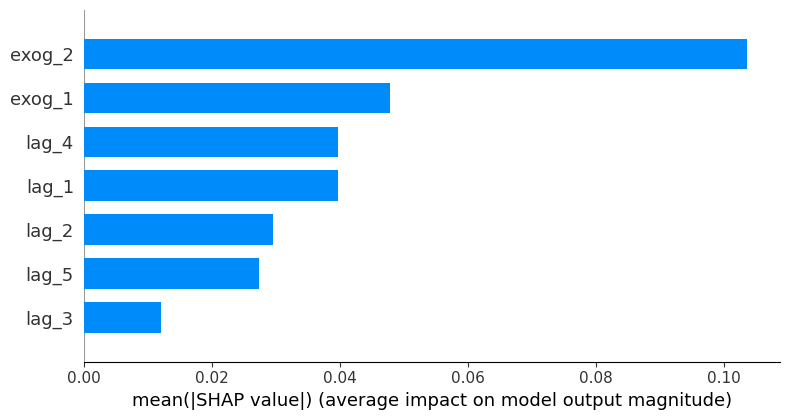

In [6]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

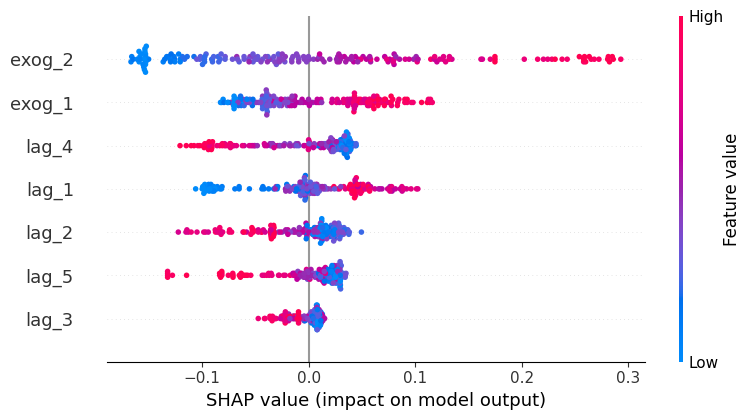

In [7]:
shap.summary_plot(shap_values, X_train)

### Explain predictions

**Visualize a single prediction**

In [8]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

**Visualize many predictions**

In [9]:
# visualize the first 200 training set predictions
shap.force_plot(explainer.expected_value, shap_values[:200,:], X_train.iloc[:200,:])

### SHAP Dependence Plots

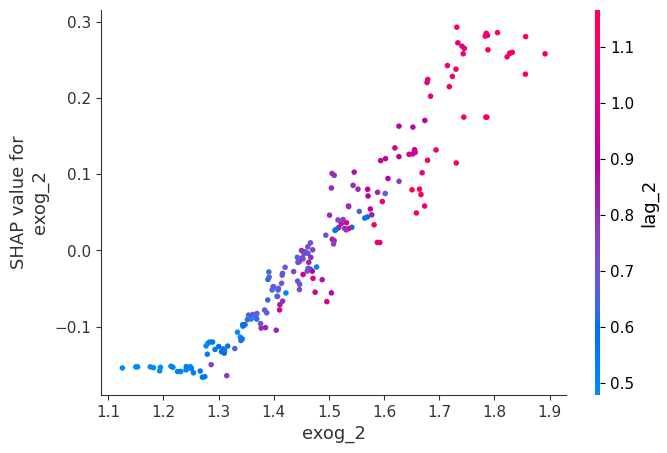

In [10]:
shap.dependence_plot("exog_2", shap_values, X_train)

In [11]:
%%html
<style>
.jupyter-wrapper .jp-CodeCell .jp-Cell-inputWrapper .jp-InputPrompt {display: none;}
</style>